# Predicting Binary Compound Chemical Stablility -- Wenbo Yan

## Overview

- [1. Problem Statement](#1.-Problem-Statement)
- [2. Approach](#2.-Approach:-Binary-Classification-Vs.-Multi-label-Classification)
    - [2.1 Binary Classification](#2.1-Binary-Classification:)
    - [2.1 Multi-label Classification](#2.2-Multi-label-Classification)
- [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    - [3.1 Load Data](#3.1-Load-Data)
    - [3.2 Check null and Missing Data](#3.2-Check-null-and-Missing-Data)
    - [3.3 Check Feature Correlations and Drop Highly Correlated Feature](#3.3-Check-Feature-Correlations-and-Drop-Highly-Correlated-Feature)
    - [3.4 Prepare Data for Binary Classification and Multi-label Classification](#3.4-Prepare-Data-into-Binary-Classification-and-Multi-label-Classification)
    - [3.5 Data Visualization](#3.5-Data-Visualization)
        - [3.5.1 Histogram of Positive Classes and Imbalanced Data](#3.5.1-Class-histogram-showed-imbalanced-data-nature-with-positive-data-only-counts-for-27%)
        - [3.5.2 Heatmap of Class Correlation](#3.5.2-Heatmap-showed-no-correlation-between-different-classes)
        - [3.5.3 Dimensionality Reduction By PCA](#3.5.3-Dimensionality-Reduction-by-Principal-Component-Analysis)
- [4. Metric Selection](#4.-Metric-Selection---F1)
- [5. Approach I - Binary Classification](#5.-Approach-I-:-Binary-Classification)
    - [5.1 Prepare Input Feature X and Label Y](#5.1-Prepare-Input-Feature-X-and-Label-Y)
    - [5.2 Model Evaluation: Logistic Regression, SVM, Random Froest and Gradient Boosting Decision Trees](#5.2-Model-Evaluation-with-Logistic-Regression(LR),-SVM,-Random-Forest(RF)-and-Gradient-Boosting-Decision-Trees(GBDT))
    - [5.3 Model Selection: Hyperparameter Tuning on SVM and Gradient Boosting Decision Trees](#5.3-Model-Selection:-Hyperparameter-Tuning-on-SVM-and-Gradient-Boosting-Decision-Trees)
        - [5.3.1 SVM](#5.3.1-SVM)
        - [5.3.2 RF](#5.3.2-RF)
        - [5.3.3 GBDT](#5.3.3-Gradient-Boosting-Decision-Trees(GBDT))
- [6. Binary Classification Summary](#6.-Binary-Classification-Summary)
- [7. Binary Classification Test Data Prediction](#7.-Binary-Classification-Test-Data-Prediction)
- [8. Approach II - Multi-label Classification](#8.-Approach-II:-Multi-label-Calssification)
    - [8.1 Prepare Input X and Label Y](#8.1-Prepare-the-Input-Features-X-and-Label-Y)
    - [8.2 Binary Relevance Model Evaluation: LR, SVM, RF, GBDT](#8.2-Binary-Relevance-Model-Evaluation:-LR,-SVM,-RF-and-GBDT)
        - [8.2.1 LR](#8.2.1-LR)
        - [8.2.2 SVM](#8.2.2-SVM)
        - [8.2.3 GBDT](#8.2.3-GBDT)
        - [8.2.4 RF](#8.2.4-RF)
    - [8.3 Classifier Chains](#8.3-Classifier-Chains)
- [9. Binary Classification Vs. Multi-label Classification](#9.-Binary-Classification-Vs.-Multi-label-Classification)
- [10. Test Data Prediction and Submission](#10.-Test-Data-Prediction-and-Submission)
       

## 1. Problem Statement 

#### Given a pair of elements, predict the stable binary compounds that forms on mixing.

## 2. Approach: Binary Classification Vs. Multi-label Classification

### 2.1 Binary Classification: 
#### The data contains element A and element B physical and chemical properties in numerical values. The stablility, which was the label of the data, is in (1 X 11) dimentional vector format. Based on my understanding, the composition ratio of A : B is a very inportant factor. First approach is to extract the composition ratio information as a separate feature and transform this dataset into a binary classification problem. For example, for each row, I will duplicate it into 11 rows and then add a 'B ratio' column as 100, 90, ... 0. For each sample, the label will be either '1'(stable) or '0'(non stable).  There are supervised models such as logistic regression, SVM, random forest, XGBoost, naive bayes and neural networks for this type of classification. 

### 2.2 Multi-label Classification
#### For each row of sample in raw data set, it has11 labels in stablity vector depending on the composition ratio of A and B. There are different ways in predicting multi-label classifications including Binary Relevance and Classifier Chains which will be discussed below.

## 3. Exploratory Data Analysis

#### There is no missing data. Found 13 features are highly correlated (corr coefficient > 0.9) with another feature and I decide to drop these features, which ended up with 84 features.

In [1]:
# Load packages
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 3.1 Load Data

In [2]:
# Load training data to pandas
df = pd.read_csv('training_data.csv')
df.head()

formulaA formulaB  formulaA_elements_AtomicVolume  \
0       Ac       Ag                       37.433086   
1       Ac       Al                       37.433086   
2       Ac       As                       37.433086   
3       Ac       Ba                       37.433086   
4       Ac       Bi                       37.433086   

   formulaB_elements_AtomicVolume  formulaA_elements_AtomicWeight  \
0                       17.075648                           227.0   
1                       16.594425                           227.0   
2                       21.723966                           227.0   
3                       64.969282                           227.0   
4                       35.483459                           227.0   

   formulaB_elements_AtomicWeight  formulaA_elements_BoilingT  \
0                      107.868200                      3473.0   
1                       26.981539                      3473.0   
2                       74.921600                      3473.0   
3                      137.327000                      3473.0   
4                      208.980400                      3473.0   

   formulaB_elements_BoilingT  formulaA_elements_BulkModulus  \
0                      2435.0                            0.0   
1                      2792.0                            0.0   
2                       887.0                            0.0   
3                      2143.0                            0.0   
4                      1837.0                            0.0   

   formulaB_elements_BulkModulus  \
0                          100.0   
1                           76.0   
2                           22.0   
3                            9.6   
4                           31.0   

                       ...                        formulaB_elements_Row  \
0                      ...                                            5   
1                      ...                                            3   
2                      ...                                            4   
3                      ...                                            6   
4                      ...                                            6   

   formulaA_elements_ShearModulus  formulaB_elements_ShearModulus  \
0                             0.0                            30.0   
1                             0.0                            26.0   
2                             0.0                             0.0   
3                             0.0                             4.9   
4                             0.0                            12.0   

   formulaA_elements_SpaceGroupNumber  formulaB_elements_SpaceGroupNumber  \
0                                 225                                 225   
1                                 225                                 225   
2                                 225                                 166   
3                                 225                                 229   
4                                 225                                  12   

   avg_coordination_A  avg_coordination_B  avg_nearest_neighbor_distance_A  \
0                12.0                12.0                          3.99462   
1                12.0                12.0                          3.99462   
2                12.0                 3.0                          3.99462   
3                12.0                 8.0                          3.99462   
4                12.0                 3.0                          3.99462   

   avg_nearest_neighbor_distance_B  \
0                          2.94195   
1                          2.85595   
2                          2.55790   
3                          4.35637   
4                          3.11221   

                                    stabilityVec  
0  [1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]  
1  [1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]  
2  [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]  
3  [1.0,0.0,0.0,0.0,0.0,0.0,0.0,

### 3.2 Check null and Missing Data

In [3]:
# Check if there is any missing data using df.info() and df.describe()
df.describe()
#df.info()

formulaA_elements_AtomicVolume  formulaB_elements_AtomicVolume  \
count                     2572.000000                     2572.000000   
mean                      2207.340923                     2220.778005   
std                       8729.184304                     8751.899407   
min                          7.297767                        7.297767   
25%                         15.858734                       15.858734   
50%                         26.082658                       26.966785   
75%                         34.784501                       34.784501   
max                      37236.035560                    37236.035560   

       formulaA_elements_AtomicWeight  formulaB_elements_AtomicWeight  \
count                     2572.000000                     2572.000000   
mean                       112.319674                      113.247322   
std                         65.258759                       65.877000   
min                          4.002602                        4.002602   
25%                         55.845000                       55.845000   
50%                        107.868200                      107.868200   
75%                        164.930320                      167.259000   
max                        238.028910                      238.028910   

       formulaA_elements_BoilingT  formulaB_elements_BoilingT  \
count                 2572.000000                 2572.000000   
mean                  2733.916283                 2740.693188   
std                   1507.624155                 1510.148266   
min                      4.070000                    4.070000   
25%                   1469.000000                 1615.000000   
50%                   2973.000000                 2973.000000   
75%                   3680.000000                 3676.250000   
max                   5869.000000                 5869.000000   

       formulaA_elements_BulkModulus  formulaB_elements_BulkModulus  \
count                    2572.000000                    2572.000000   
mean                       74.569868                      78.194751   
std                        93.757854                      96.094178   
min                         0.000000                       0.000000   
25%                         6.300000                       7.700000   
50%                        38.700000                      41.000000   
75%                       110.000000                     120.000000   
max                       380.000000                     380.000000   

       formulaA_elements_Column  formulaB_elements_Column  \
count               2572.000000               2572.000000   
mean                   7.992224                  8.064930   
std                    5.496219                  5.475384   
min                    1.000000                  1.000000   
25%                    3.000000                  3.000000   
50%                    7.000000                  7.000000   
75%                   13.000000                 13.000000   
max                   18.000000                 18.000000   

                    ...                 formulaA_elements_Row  \
count               ...                           2572.000000   
mean                ...                              4.844090   
std                 ...                              1.377499   
min                 ...                              1.000000   
25%                 ...                              4.000000   
50%                 ...                              5.000000   
75%                 ...                              6.000000   
max                 ...                              7.000000   

       formulaB_elements_Row  formulaA_elements_ShearModulus  \
count            2572.000000                     2572.000000   
mean                4.857698                       34.256726   
std                 1.373744                       50.611912   
min                 1.000000                        0.000000   
25%      

In [7]:
df.isnull().sum()

formulaA                                      0
formulaB                                      0
formulaA_elements_AtomicVolume                0
formulaB_elements_AtomicVolume                0
formulaA_elements_AtomicWeight                0
formulaB_elements_AtomicWeight                0
formulaA_elements_BoilingT                    0
formulaB_elements_BoilingT                    0
formulaA_elements_BulkModulus                 0
formulaB_elements_BulkModulus                 0
formulaA_elements_Column                      0
formulaB_elements_Column                      0
formulaA_elements_CovalentRadius              0
formulaB_elements_CovalentRadius              0
formulaA_elements_Density                     0
formulaB_elements_Density                     0
formulaA_elements_ElectronSurfaceDensityWS    0
formulaB_elements_ElectronSurfaceDensityWS    0
formulaA_elements_Electronegativity           0
formulaB_elements_Electronegativity           0
formulaA_elements_FirstIonizationEnergy 

### 3.3 Check Feature Correlations and Drop Highly Correlated Feature

In [3]:
# Find if there is any columns are highly correlated.
# pandas_profiling.ProfileReport(df)

In [9]:
# Drop 13 features which are highly correlated with another feature in dataset. Drop formulaA and formulaB.
df_new = df.copy()
df_new = df_new.drop(['formulaA_elements_GSbandgap','formulaA_elements_GSestBCClatcnt', 'formulaA_elements_GSvolume_pa',
                     'formulaA_elements_ICSDVolume','formulaA_elements_Column', 'formulaA_elements_Number', 
                      'formulaA_elements_Row','formulaB_elements_GSestBCClatcnt', 'formulaB_elements_GSvolume_pa',
                     'formulaB_elements_ICSDVolume','formulaB_elements_Column', 'formulaB_elements_Number',
                      'formulaB_elements_Row', 'formulaA', 'formulaB'], axis = 1)

### 3.4 Prepare Data into Binary Classification and Multi-label Classification

In [10]:
# Step 1. Transform the stability vector [1,0,....,1] into 11 separated columns/classes.
# Step 2. For each class, the composition ratio of A:B can be considered as 100, 90, 80, ..., 0. 
# Extract the ratio of A:B to a separate column and add it to feature dataset (X)
# Step 3. Aggregate data to binary classification: generate 'label' with 1 or 0 to each sample.
# Step 4. Output three data sets: df contains input X and 11 classes; y_data contains 11 separate classes; 
# dfc contains input X plus one A:B composition and 1 binary classification label.



def binary_composition(df):
    #Transform the stablility vector [1,0,....,1] into 11 separated classes.
    df['temp'] = df['stabilityVec'].apply(lambda x: x[1:-1].split(','))
    for i in range(len(df['temp'][0])):
        df['class_' + str(i)] = df['temp'].apply(lambda x: x[i])
        df['class_' + str(i)] = df['class_' + str(i)].astype(np.float)
    df = df.drop(['temp', 'stabilityVec'], axis = 1)
    x_data = df.iloc[:, : -11]
    y_data = df.iloc[:, -11:]
    y_data = y_data.astype(np.int) #y_data.shape = n samples * 11 classes
    
    #Extract A/B composition ratio as a separate feature. 
    dfc = x_data.copy()
    for j, col in enumerate(y_data.columns):
        dfb = x_data.copy()
        dfb[col] = y_data[col]
        dfb['B_ratio'] = j * 10
        
    #generate 'label' with 1 or 0 to each sample
        dfb.rename(columns = {col: 'label'}, inplace=True)
        dfc = pd.concat([dfb, dfc],ignore_index=True)
        dfc.dropna(inplace=True)
        dfc['label'] = dfc['label'].astype(np.int)
        
    # df: 11 classes are separated; y_data: 11 columns represents 11 classes; dfc: binary class labels.
    return df, y_data, dfc 

In [11]:
# df_ml will be used in the 2nd approach for multi-label classification.
# y_class has separted 11 columns as 11 classes.
# df_bc will be used in the 1st approach which is a pure binary classification case.
df_ml, y_class, df_bc = binary_composition(df_new)

In [14]:
print(df_ml.shape) # for multi-label classification
print(y_class.shape)
print(df_bc.shape) # for binary classification

(2572, 94)
(2572, 11)
(28292, 85)


In [15]:
# A glance of the processed data.
df_bc.head()

B_ratio  avg_coordination_A  avg_coordination_B  \
0    100.0                12.0                12.0   
1    100.0                12.0                12.0   
2    100.0                12.0                 3.0   
3    100.0                12.0                 8.0   
4    100.0                12.0                 3.0   

   avg_nearest_neighbor_distance_A  avg_nearest_neighbor_distance_B  \
0                          3.99462                          2.94195   
1                          3.99462                          2.85595   
2                          3.99462                          2.55790   
3                          3.99462                          4.35637   
4                          3.99462                          3.11221   

   formulaA_elements_AtomicVolume  formulaA_elements_AtomicWeight  \
0                       37.433086                           227.0   
1                       37.433086                           227.0   
2                       37.433086                           227.0   
3                       37.433086                           227.0   
4                       37.433086                           227.0   

   formulaA_elements_BoilingT  formulaA_elements_BulkModulus  \
0                      3473.0                            0.0   
1                      3473.0                            0.0   
2                      3473.0                            0.0   
3                      3473.0                            0.0   
4                      3473.0                            0.0   

   formulaA_elements_CovalentRadius  ...    formulaB_elements_NfUnfilled  \
0                               215  ...                               0   
1                               215  ...                               0   
2                               215  ...                               0   
3                               215  ...                               0   
4                               215  ...                               0   

   formulaB_elements_NfValence  formulaB_elements_NpUnfilled  \
0                            0                             0   
1                            0                             5   
2                            0                             3   
3                            0                             0   
4                           14                             3   

   formulaB_elements_NpValence  formulaB_elements_NsUnfilled  \
0                            0                             1   
1                            1                             0   
2                            3                             0   
3                            0                             0   
4                            3                             0   

   formulaB_elements_NsValence  formulaB_elements_Polarizability  \
0                            1                              6.99   
1                            2                              6.80   
2                            2                              4.31   
3                            2                             39.70   
4                            2                              0.40   

   formulaB_elements_ShearModulus  formulaB_elements_SpaceGroupNumber  label  
0                            30.0                                 225      1  
1                            26.0                                 225      1  
2                             0.0                                 166      1  
3                             4.9                                 229      1  
4                            12.0                                  12      1  

[5 rows x 85 columns]

### 3.5 Data Visualization

#### 3.5.1 Class histogram showed imbalanced data nature with positive data only counts for 27%

#### There are multiple ways to deal with imbalanced data. Approach used here is upsampling the minority class by SMOTE: Synthetic Minority Over-sampling Technique. After the SMOTE method, in the training data set, the ratio of positive to negative should be 1:1. Here is how this method works:
1. Partition the data into training and test data and apply the following two steps on train data ONLY.
2. Finding the k-nearest-neighbors for minority class observations in the training data.
3. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but random new observation.

#### Another method is to apply 'class_weight='balanced'' when implement the SVM, RF and LR algorithms. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

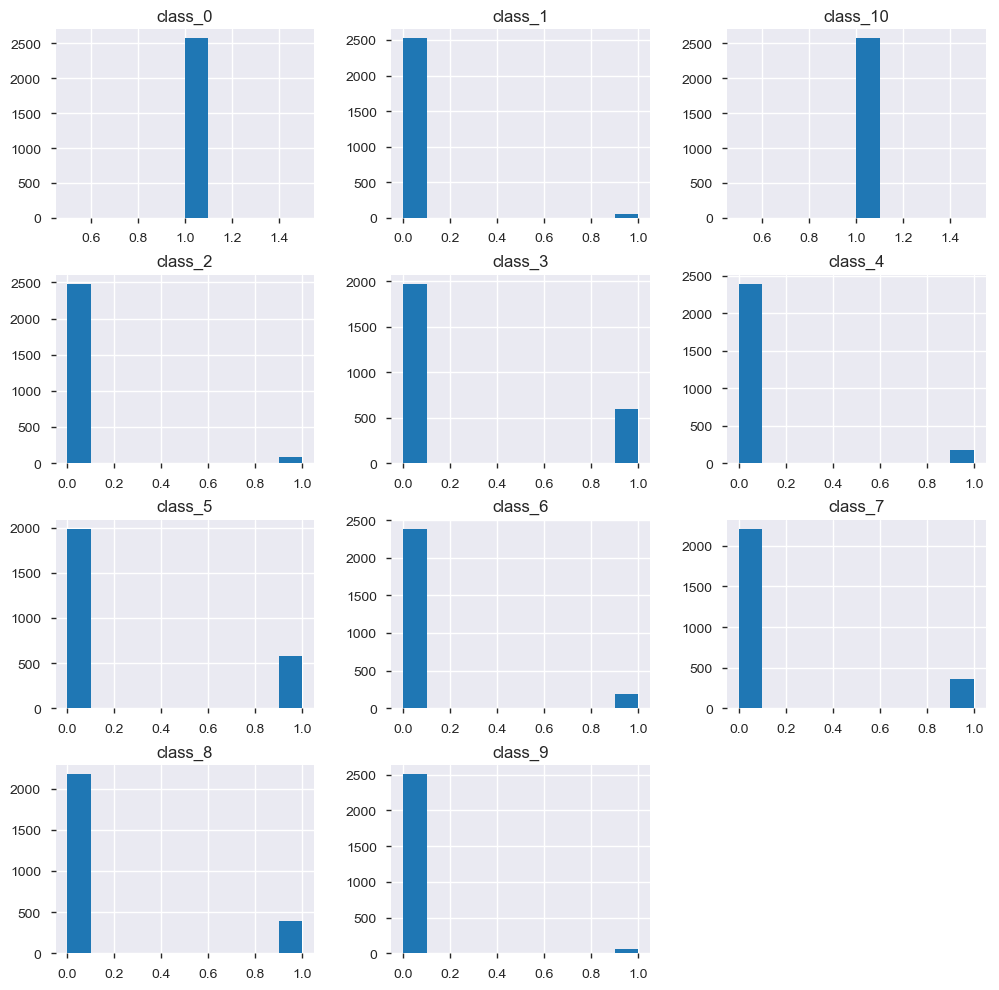

In [16]:
# All 11 classes histogram
y_class.hist(figsize = (12, 12));

In [17]:
positive_ratio = len(df_bc[df_bc['label'] == 1])/len(df_bc) * 100
print('{}% data is positive.'.format(np.round(positive_ratio), 3))

27.0% data is positive.


#### 3.5.2 Heatmap showed no correlation between different classes

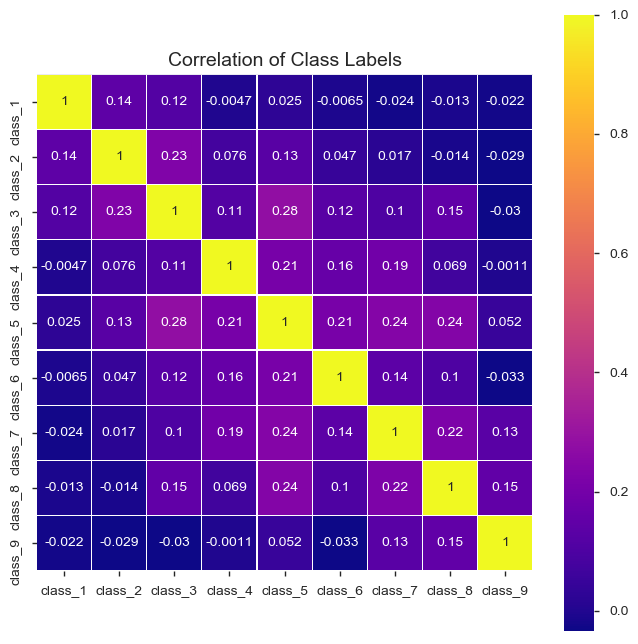

In [18]:
# 9 classes correlation coefficients showed all classes are not correlated
colormap = plt.cm.plasma
plt.figure(figsize=(8,8))
plt.title('Correlation of Class Labels',y=1,size=14)
sns.heatmap(y_class.iloc[:,1:10].astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True);

In [4]:
# pandas_profiling.ProfileReport(df_bc)

#### 3.5.3  Dimensionality Reduction by Principal Component Analysis

The dataset has 84 features. Thus, I use PCA to transform this high dimensional data to lower dimensional space to visualize the variation and check if I can select a few features for model prediction.

As indicated from the following figure, the first principal component only accounts for 10 percent of the variance. Also, we can see that the first ten principal components combined explain around 60 percent of the variance in the data.

In [20]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

def pca(X_data):
    pca = PCA(n_components = 20)
    # nomralize the feature scales before applying PCA
    scaler = StandardScaler()
    X_data_std = scaler.fit_transform(X_data)
    
    pca.fit_transform(X_data_std)
    ratio = pca.explained_variance_ratio_
    plt.figure(figsize = (6,4))
    plt.bar(range(1,21), ratio, alpha=0.5, align='center')
    plt.step(range(1,21), np.cumsum(ratio), color = 'orange', where='mid')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.show()

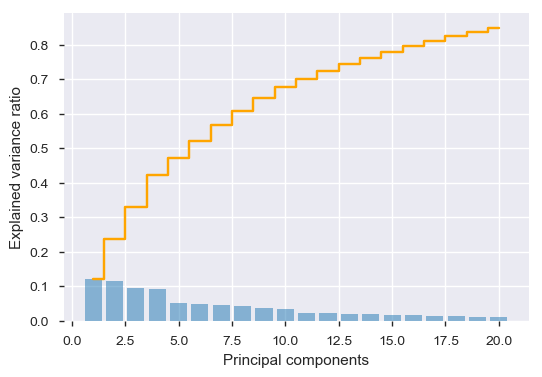

In [21]:
X = df_bc.drop(['label'], axis = 1)
pca(X)

## 4. Metric Selection - F1

#### Accuracy: For this imbalanced data problem, it is very easy to get a high accuracy score because it tends to predict the majority class. Thus it is not a good metric.
#### Precision: precision = True Positive/(True Positive + False Positive), is used if we do not want to misclassify negative samples.  For example, for scam detection, we do not want to misclassify non-scam (negative) emails and miss any non-scam emails. 
#### Recall: recall = True Positive/(True Positive + False Negative), is used if we do not want risk missing any true positives. For example, in tumor detection, we care more about detecting the malignant becuase missing that will be detrimental to cancer patients. 
#### F1 score: f1 = 2 * precision * recall/(precision + recall) takes consideration of both precision and recall. In our case, if our customer want to invest in making a new compound, we care both precision and recall thus F1 score is chosen for the metric.
#### ROC, AUC and Confusion Matrix are also referred as a metric below.

## 5. Approach I : Binary Classification

### 5.1 Prepare Input Feature X and Label Y

In [22]:
# Prepare training dataset with features (X) and labels (Y) for binary classification
X = df_bc.drop(['label'], axis = 1)
y = df_bc['label']
print('No. of features: ',len(X.columns))
print('X dimension:', X.shape)
print('y dimension:', y.shape)

No. of features:  84
X dimension: (28292, 84)
y dimension: (28292,)


### 5.2 Model Evaluation with Logistic Regression(LR), SVM,  Random Forest(RF) and Gradient Boosting Decision Trees(GBDT)

### LR showed worst perfomance, and GBDT is the best.

1. Since data is imbalanced, I add 'class_weight = 'balanced'' into traing algorithms.

2. Logistic regression did not perform well because it does not handle high dimentional data very well and plus the data is not linearly sparatable. 

3. For SVM, there are two kernels to use, 'linear' Vs. 'rbf'. Since we have high dimentional features and PCA already showed the high variance accross all features, thus we could understand the linear kernel probably will not work well. 'rbf' is a gaussian kernel which map the original features to a different feature space using a gaussian function. There are two parameters to tune here. 'C' is the regularization parameter and 'gamma' is the kernel parameter which represents how wide the gaussian kernel. Usually large C indicates less regularization and tends to overfit the training data; large gamma indicates narrower guassian kernel and tends to overfit the training data. Since SVM showed promising performance compared to RF and GBDT, I will do a fine hyperparameter tunning for SVM to get the best model. 

4. Random forest outperformed SVM. We can get feature importance from this model and usually there is no need to fine tune the hyperparameters. It is less prone to overfit the data since it is an ensemble method.

5. Gradient boosting decision trees performed the best with high F1 score. The algorithm is built upon a series of small decision trees and each tree is attempted to correct errors from the earlier stage. The hyperparameters includes no. of trees, learning rates and max depth. Learning rate controls how hard each new tree tries to correct remaining mistakes from previous round. Usually high learning rates means more complex trees and low learning rate means simpler trees. The model does require a lot of computation compared to other models and it will not perform well on high dimensional sparse feature. And this could be the reason why it did not perform as well as random forest in the 2nd approach where I have to train each class as a separate classifier. 


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import auc, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

# Construct the binary classification class to test on different models:

# Step 1: initialize global parameters
# Step 2: partition the train and test set with 3:1 raio and all samples should be randomized before split
# Step 3: standardize the features (both train and test) using StandardScaler which standardizes each features 
# to gaussian distribution with mean at 0 and unit variance.
# Step 4: Fit the training data and use F1 score as metric. 


class BinaryClassification():
    def __init__(self, estimator, scoring = [precision_score, recall_score,f1_score], 
                 test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.test_size = test_size
        self.random_state = random_state
        
    def standardization(self, X_train, X_test):
        # Normalize data into normal distributed with mean at 0 and unit variance.
        scaler = StandardScaler()
        # Only fit on the training data
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled   

        
    def fit(self, X, y):
        # Split train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = self.test_size,random_state=self.random_state,shuffle = True,stratify = y)
        
        X_train_scaled, X_test_scaled = self.standardization(X_train, X_test)
        
        scores = self._calc_score(X_train_scaled, y_train, 
                                 X_test_scaled, y_test)
        
        self.scores_ = {'Precision': np.round(scores[0], 3),'Recall': np.round(scores[1], 3),
                        'F1': np.round(scores[2], 3)}
        return self

    
    def _calc_score(self, X_train_scaled, y_train, X_test_scaled, y_test):
        # fit training data
        self.estimator.fit(X_train_scaled, y_train)
        # predict the test set
        y_pred = self.estimator.predict(X_test_scaled)
        # record precision, recall, F1 scores
        scores = []
        for score_type in self.scoring:
            score = score_type(y_test, y_pred)
            scores.append(score)
            
        return scores
    
    def roc_cm(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = self.test_size,random_state=self.random_state,shuffle = True,stratify = y)
        
        X_train_scaled, X_test_scaled = self.standardization(X_train, X_test)     
        self.estimator.fit(X_train_scaled, y_train)
    
        y_pred_rf = self.estimator.predict_proba(X_test_scaled)
        y_pred = self.estimator.predict(X_test_scaled)

        # get fpr, tpr and thresholds to draw ROC curve
        fpr, tpr, thresholds = roc_curve(y_test,y_pred_rf[:, 1],pos_label=1)
        roc_auc = auc(fpr,tpr)

        # Plot ROC
        plt.figure(figsize = (6, 4))
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.0])
        plt.ylim([-0.1,1.01])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
        # Plot Confusion Matrix
        confusionMatrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
        
        fig, ax = plt.subplots(figsize=(3, 3))
        ax.matshow(confusionMatrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confusionMatrix.shape[0]):
            for j in range(confusionMatrix.shape[1]):
                ax.text(x=j, y=i, s=confusionMatrix[i, j], va='center', ha='center')
                
        plt.title('Confusion Matrix', y = 1.2)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()
            

In [28]:
# Logistic Regression: Add regularization term L1 with C 0.1 here. Other parameters were tested but no improvement
lr = LogisticRegression(penalty = 'l1', C = 0.1,class_weight='balanced')
lr_clf = BinaryClassification(lr)
lr_clf.fit(X, y)
print('Logistic Regression:', lr_clf.scores_)

Logistic Regression: {'Precision': 0.329, 'Recall': 0.592, 'F1': 0.423}


In [29]:
# SVM with rbf kernel: Improved performance based on LR and a little worse than RF.
# Next step: fine tune hyperparameters and find out the best SVM model.
svm = SVC(kernel = 'rbf', C = 1, gamma=0.01,class_weight='balanced')
svm_clf = BinaryClassification(svm)
svm_clf.fit(X, y)
print('SVM:', svm_clf.scores_)

SVM: {'Precision': 0.423, 'Recall': 0.61, 'F1': 0.5}


In [30]:
# Random forest showed good F1 score
forest = RandomForestClassifier(n_estimators=500, class_weight='balanced')
forest_clf = BinaryClassification(forest)
forest_clf.fit(X, y)
print('Random Forest:',forest_clf.scores_)

Random Forest: {'Precision': 0.723, 'Recall': 0.692, 'F1': 0.707}


In [19]:
# GBDT showed best F1 score so far
# Next step: fine tune hyperparameters
GBDT = GradientBoostingClassifier(n_estimators=500)
GBDT_clf = BinaryClassification(GBDT)
GBDT_clf.fit(X, y)
print('Gradient Boosting Decision Trees:',GBDT_clf.scores_)

Gradient Boosting Decision Trees: {'Precision': 0.938, 'Recall': 0.783, 'F1': 0.853}


### 5.3  Model Selection: Hyperparameter Tuning on SVM and Gradient Boosting Decision Trees

#### GBDT with F1 score of 0.86 outperforms both SVM and Random Forest. 

#### 5.3.1 SVM

1. Using 5 fold cross validation to find best hyperparameters for SVM with F1 0.643: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
2. Other than F1 score, also refer to ROC curve and Area Under Curve(AUC) for model evaluation. 

In [32]:
from sklearn.model_selection import StratifiedKFold

# Goal: Find best hyperparameter for SVM
# Step1: standardize both traing and test data
# Step2: for different combonination of C, gamma and kernel, print all precicision and recall
# Step3: find the best parameter for SVM.

class modelSelection_SVM():
    def __init__(self, scoring = [precision_score, recall_score,f1_score], test_size = 0.25, random_state =1):
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
        
    def standardization(self, X_train, X_test):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

    def gridSearch(self, X, y, C = [0.001, 0.01, 0.1, 1, 10, 100], gamma = [0.001, 0.01, 0.1, 1, 10, 100]):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.25, random_state = 1, shuffle = True,stratify = y)

        X_train_scaled, X_test_scaled = self.standardization(X_train, X_test)
        
        # grid serach all C and gamma combinations: 6 x 6 = 36 fittings
        for c in C:
            for g in gamma:        
                clf = SVC(C = c, gamma = g, class_weight='balanced', kernel = 'rbf') 
                clf.fit(X_train_scaled, y_train)
                y_pred = clf.predict(X_test_scaled)

                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                print('C: %.3f, gamma: %.3f, precision: %.3f, recall: %.3f, F1: %.3f' % 
                        (c, g, precision, recall, f1))               

    def kFold(self, X, y, cv, c = None, gamma = None):
        # randomize the sample
        m = np.random.permutation(X.index)
        X = X.reindex(m)
        y = y.reindex(m)
        
        # split X and y into k fold for test and validation
        kfold = list(StratifiedKFold(n_splits=cv, random_state=1).split(X, y))
        
        # store scores into dictionary
        scores = {i+1: [] for i in range(cv)}

        for k, (train, test) in enumerate(kfold):
            best_estimator = SVC(C = c, gamma = gamma, class_weight='balanced', kernel = 'rbf') 
            X_train, X_test = self.standardization(X.iloc[train], X.iloc[test])
            clf = best_estimator.fit(X_train, y.iloc[train])
            y_pred = clf.predict(X_test)
            for score in self.scoring:
                scores[k+1].append(score(y.iloc[test], y_pred))

            print('Fold: %2d, Class dist.: %s, precision: %.3f, recall: %.3f, F1: %.3f' % (k+1,
                        np.bincount(y.iloc[train]), scores[k+1][0], scores[k+1][1], scores[k+1][2]))

        print('\nCV precision: %.3f +/- %.3f' % (np.mean([scores[i+1][0] for i in range(cv)]), 
                                                 np.std([scores[i+1][0] for i in range(cv)])))
        print('CV recall: %.3f +/- %.3f' % (np.mean([scores[i+1][1] for i in range(cv)]), 
                                                 np.std([scores[i+1][1] for i in range(cv)])))
        print('CV F1: %.3f +/- %.3f' % (np.mean([scores[i+1][2] for i in range(cv)]), 
                                                 np.std([scores[i+1][2] for i in range(cv)])))

    def ROC(self, X, y, c=None, gamma=None):
        best_estimator = SVC(C = c, gamma = gamma, class_weight='balanced', kernel = 'rbf') 
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.25, random_state = 1, shuffle = True,stratify = y)

        X_train_scaled, X_test_scaled = self.standardization(X_train, X_test)
        best_estimator.fit(X_train_scaled, y_train)
        y_pred_score = best_estimator.decision_function(X_test_scaled)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_score, pos_label=1 )

        roc_auc = auc(fpr,tpr)

        # Plot ROC
        plt.figure(figsize = (6, 4))
        plt.title('Receiver Operating Characteristic--SVM')
        plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([0,1.0])
        plt.ylim([-0.1,1.01])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [111]:
model = modelSelection_SVM()
model.gridSearch(X, y)

C: 0.001, gamma: 0.001, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.001, gamma: 0.010, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.001, gamma: 0.100, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.001, gamma: 1.000, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.001, gamma: 10.000, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.001, gamma: 100.000, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.010, gamma: 0.001, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.010, gamma: 0.010, precision: 0.325, recall: 0.683, F1: 0.440
C: 0.010, gamma: 0.100, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.010, gamma: 1.000, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.010, gamma: 10.000, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.010, gamma: 100.000, precision: 0.270, recall: 1.000, F1: 0.425
C: 0.100, gamma: 0.001, precision: 0.320, recall: 0.651, F1: 0.429
C: 0.100, gamma: 0.010, precision: 0.344, recall: 0.644, F1: 0.448
C: 0.100, gamma: 0.100, precision: 0.324, recall: 0.559,

In [88]:
# K fold cross validataion showed the average F1 score is 0.637 for SVM. Till now, I found the 
# best hyparameters for SVM, which is: C=100, gamma=0.01 and F1: 0.637 +/- 0.009
model = modelSelection_SVM()
model.kFold(X, y, cv = 5, c = 100.0, gamma = 0.01)

Fold:  1, Class dist.: [16524  6109], precision: 0.573, recall: 0.724, F1: 0.640
Fold:  2, Class dist.: [16524  6109], precision: 0.561, recall: 0.745, F1: 0.640
Fold:  3, Class dist.: [16524  6110], precision: 0.572, recall: 0.739, F1: 0.645
Fold:  4, Class dist.: [16524  6110], precision: 0.570, recall: 0.724, F1: 0.638
Fold:  5, Class dist.: [16524  6110], precision: 0.543, recall: 0.722, F1: 0.620

CV precision: 0.564 +/- 0.011
CV recall: 0.731 +/- 0.009
CV F1: 0.637 +/- 0.009


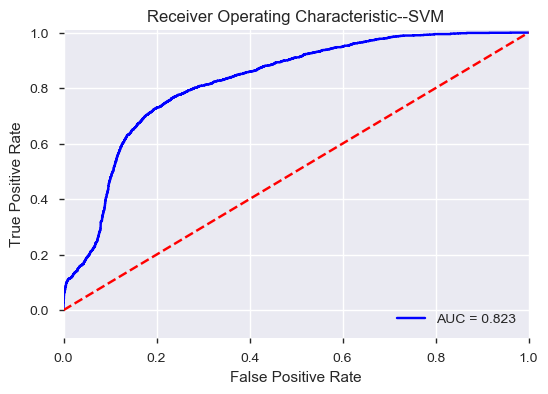

In [33]:
# Plot ROC curve and get AUC 0.823, not that bad. Ideally we want the blue curve to be as further away from the
# red curve as possible and best AUC score would be 1.0 in this case. Red curve represent random guess (50% chance)
model = modelSelection_SVM()
model.ROC(X, y, c = 100, gamma = 0.01 )

#### 5.3.2 RF

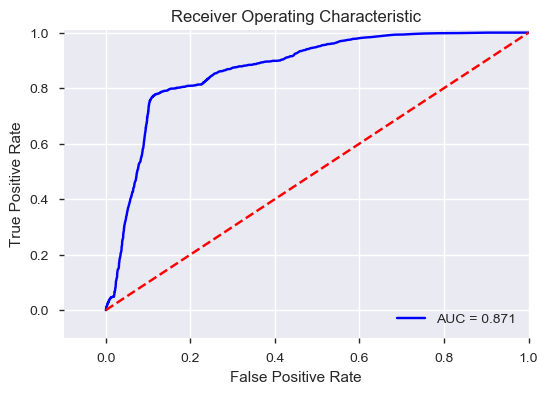

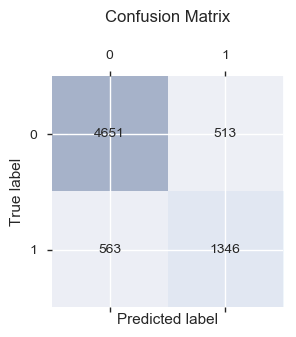

In [35]:
# Plot Random Froest ROC and Confusion Matrix
# AUC is improved and the ROC curve looks better than SVM
forest = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
forest_clf = BinaryClassification(forest)
forest_clf.roc_cm(X, y)

#### 5.3.3 Gradient Boosting Decision Trees(GBDT)

In [34]:
# Build a grid search function to search for best hyperparameter for GBDT


def GBDT(n_trees , depth , rate , X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.25, random_state = 1, shuffle = True, stratify = y)
    
    # store scores into dictionary
    scores = {}
    # grid search all combinations of no. of trees, learning rate and max depth: 2 x 4 x 3 = 24 fittings
    for n in n_trees:
        for r in rate:
            for d in depth:
                clf = GradientBoostingClassifier(n_estimators = n, max_depth = d, learning_rate = r)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                scores[(n, r, d)] = f1_score(y_test, y_pred)
                #print(scores)
                
    # initialize the maximum F1 score to 0
    fmax = 0
    best_para = []
    
    # find the best F1 score out of the parameter grid
    for k, v in scores.items():
        if v > fmax:
            fmax = v
            best_para = [n, r, d]
            
    print ('Gradient Boosting Classifier best hyperparameters: n_estimators: %d, learing_rate: %.2f,\
           max_depth: %d, F1 Score: %.3f'% (best_para[0], best_para[1], best_para[2], fmax ))

In [32]:
GBDT(n_trees = [500, 1000], depth = [1,3,5,8], rate = [0.01, 0.1,1], X=X, y=y)

Gradient Boosting Classifier best hyperparameters: n_estimators: 1000, learing_rate: 1.00,           max_depth: 8, F1 Score: 0.867


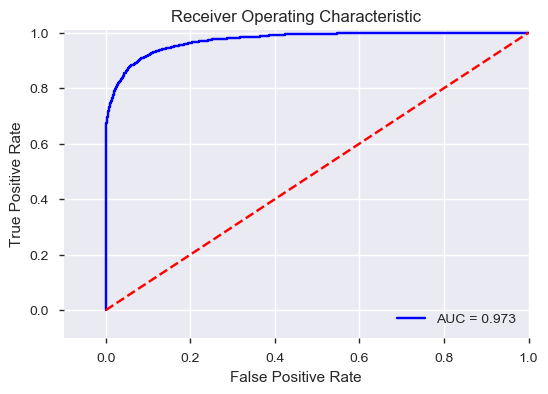

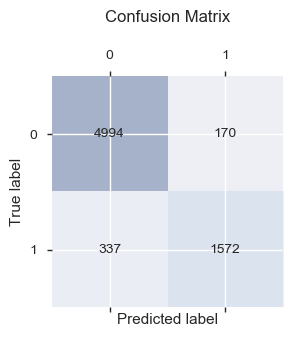

In [36]:
# Plot GBDT ROC and Confusion Matrix
# Till now, the model is fine tuned and best parameter for GBDT was found: n_estimators = 1000, max_depth = 5, 
# learning_rate = 0.1. ROC curve looks very good with AUC 0.97.
gbdt = GradientBoostingClassifier(n_estimators = 1000, max_depth = 5, learning_rate = 0.1)
gbdt_clf = BinaryClassification(gbdt)
gbdt_clf.roc_cm(X, y)

## 6. Binary Classification Summary

### Gradient Boosting Decision Trees performed better than SVM and Random Forest models in terms of F1 score. After fine tuning the SVM model, both precision and recall is improved but still not as good as GBDT. Thus, GBDT is selected to predict the test dataset.

### Final Results:
#### Gradient Boosting Decision Trees: {'Precision': 0.938, 'Recall': 0.783, 'F1': 0.853}, AUC: 0.97
#### Random Forest: {'Precision': 0.727, 'Recall': 0.709, 'F1': 0.718}, AUC: 0.87
#### SVM with rbf kernel: {'Precision': 0.573, 'Recall': 0.724, 'F1': 0.640}, AUC: 0.82

## 7. Binary Classification Test Data Prediction

In [37]:
# Load Test Data
test= pd.read_csv('test_data.csv')

In [38]:
test.head()
#test.info()
#test.isnull().sum()

formulaA formulaB  formulaA_elements_AtomicVolume  \
0       Ac       Be                       37.433086   
1       Ac       Cd                       37.433086   
2       Ac       Cs                       37.433086   
3       Ac       Ho                       37.433086   
4       Ac        K                       37.433086   

   formulaB_elements_AtomicVolume  formulaA_elements_AtomicWeight  \
0                        8.098176                           227.0   
1                       21.580025                           227.0   
2                      117.456016                           227.0   
3                       31.140380                           227.0   
4                       75.847865                           227.0   

   formulaB_elements_AtomicWeight  formulaA_elements_BoilingT  \
0                        9.012182                      3473.0   
1                      112.411000                      3473.0   
2                      132.905452                      3473.0   
3                      164.930320                      3473.0   
4                       39.098300                      3473.0   

   formulaB_elements_BoilingT  formulaA_elements_BulkModulus  \
0                      2743.0                            0.0   
1                      1040.0                            0.0   
2                       944.0                            0.0   
3                      2973.0                            0.0   
4                      1032.0                            0.0   

   formulaB_elements_BulkModulus               ...                 \
0                          130.0               ...                  
1                           42.0               ...                  
2                            1.6               ...                  
3                           40.0               ...                  
4                            3.1               ...                  

   formulaA_elements_Row  formulaB_elements_Row  \
0                      7                      2   
1                      7                      5   
2                      7                      6   
3                      7                      6   
4                      7                      4   

   formulaA_elements_ShearModulus  formulaB_elements_ShearModulus  \
0                             0.0                           132.0   
1                             0.0                            19.0   
2                             0.0                             0.0   
3                             0.0                            26.0   
4                             0.0                             1.3   

   formulaA_elements_SpaceGroupNumber  formulaB_elements_SpaceGroupNumber  \
0                                 225                                 194   
1                                 225                                 194   
2                                 225                                 229   
3                                 225                                 194   
4                                 225                                 229   

   avg_coordination_A  avg_coordination_B  avg_nearest_neighbor_distance_A  \
0                12.0                12.0                          3.99462   
1                12.0                 6.0                          3.99462   
2                12.0                 8.0                          3.99462   
3                12.0                12.0                          3.99462   
4                12.0                 8.0                          3.99462   

   avg_nearest_neighbor_distance_B  
0                          2.20087  
1                          3.00785  
2                          5.32395  
3                          3.48112  
4                          4.57083  

[5 rows x 98 columns]

In [38]:
pandas_profiling.ProfileReport(test)

In [39]:
# Prepare test data into binary format(same dimension as traing data)for prediction
def test_to_binary(test):
    df_new = pd.DataFrame()
    for i in range(11):
        df = test.copy()
        df['B ratio'] = i * 10
        df_new = pd.concat([df, df_new])
        # drop the highly correlated features
        df_new = df_new.drop(['formulaA_elements_GSbandgap','formulaA_elements_GSestBCClatcnt', 'formulaA_elements_GSvolume_pa',
                     'formulaA_elements_ICSDVolume','formulaA_elements_Column', 'formulaA_elements_Number', 
                      'formulaA_elements_Row','formulaB_elements_GSestBCClatcnt', 'formulaB_elements_GSvolume_pa',
                     'formulaB_elements_ICSDVolume','formulaB_elements_Column', 'formulaB_elements_Number',
                      'formulaB_elements_Row', 'formulaA', 'formulaB'], axis = 1)
    return df_new

# Using GBDT to predict the test data        
def GBDT(X, y, test):
    df_test = test.sort_values(by=['formulaA_elements_AtomicVolume','formulaB_elements_AtomicVolume','B ratio'])
    df_test = df_test.reset_index()
    df_test = df_test.drop('index', axis = 1)
    
    # Use best model to train then predict
    clf = GradientBoostingClassifier(n_estimators = 1000, max_depth = 5, learning_rate = 0.1)
    
    clf.fit(X, y)
    test_label = clf.predict(df_test)
    df_test['label'] = test_label
    return df_test

# After prediction, transform the test set back to orignial format with stability vector in string data type.
def binary_to_test(df_test):
    dfy = pd.DataFrame()
    for i in range(749):
        dfx = df_test.loc[i * 11 : i * 11 + 10]
        dfx['stabilityVec'] = np.nan
        result = []
        for j in dfx.index:
            result.append(str(dfx.loc[j]['label']))
            
        # stabilityVec in str data type
        dfx['stabilityVec'][j] = '[' + str(','.join(k for k in result)) + ']'
        dfy = pd.concat([dfy, dfx])
    dfy = dfy.drop('B ratio', axis = 1)
    dfy = dfy.dropna()
    dfy = dfy.drop('label', axis = 1)
    return dfy

In [40]:
#df_new.sort_values(by=['formulaA', 'formulaB'])
test_df = test_to_binary(test)
test_df.head()

B ratio  avg_coordination_A  avg_coordination_B  \
0      100                12.0                12.0   
1      100                12.0                 6.0   
2      100                12.0                 8.0   
3      100                12.0                12.0   
4      100                12.0                 8.0   

   avg_nearest_neighbor_distance_A  avg_nearest_neighbor_distance_B  \
0                          3.99462                          2.20087   
1                          3.99462                          3.00785   
2                          3.99462                          5.32395   
3                          3.99462                          3.48112   
4                          3.99462                          4.57083   

   formulaA_elements_AtomicVolume  formulaA_elements_AtomicWeight  \
0                       37.433086                           227.0   
1                       37.433086                           227.0   
2                       37.433086                           227.0   
3                       37.433086                           227.0   
4                       37.433086                           227.0   

   formulaA_elements_BoilingT  formulaA_elements_BulkModulus  \
0                      3473.0                            0.0   
1                      3473.0                            0.0   
2                      3473.0                            0.0   
3                      3473.0                            0.0   
4                      3473.0                            0.0   

   formulaA_elements_CovalentRadius                 ...                  \
0                               215                 ...                   
1                               215                 ...                   
2                               215                 ...                   
3                               215                 ...                   
4                               215                 ...                   

   formulaB_elements_NdValence  formulaB_elements_NfUnfilled  \
0                            0                             0   
1                           10                             0   
2                            0                             0   
3                            0                             3   
4                            0                             0   

   formulaB_elements_NfValence  formulaB_elements_NpUnfilled  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                           11                             0   
4                            0                             0   

   formulaB_elements_NpValence  formulaB_elements_NsUnfilled  \
0                            0                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            0                             1   

   formulaB_elements_NsValence  formulaB_elements_Polarizability  \
0                            2                              5.60   
1                            2                              7.32   
2                            1                             59.42   
3                            2                             23.60   
4                            1                             43.23   

   formulaB_elements_ShearModulus  formulaB_elements_SpaceGroupNumber  
0                           132.0                                 194  
1                            19.0                                 194  
2                             0.0                                 229  
3                            26.0                                 194  
4                             1.3                                 229  

[5 

In [41]:
test_label = GBDT(X, y, test_df)

In [42]:
submission_test = binary_to_test(test_label)

In [43]:
sub = submission_test[['formulaA_elements_AtomicWeight','formulaB_elements_AtomicWeight', 'stabilityVec']]

In [44]:
df_test_submission = pd.merge(test, sub, on=['formulaA_elements_AtomicWeight','formulaB_elements_AtomicWeight'], how = 'inner')

In [45]:
#df_test_submission.sort_values(by=['formulaA_elements_AtomicVolume','formulaB_elements_AtomicVolume'])
df_test_submission.to_csv('test_data_submission.csv')

## 8. Approach II: Multi-label Calssification 

### There are a few well known methods for multi-label classification problem:
##### 1. Binary Relevance: Treat each class as a binary classification problem and train the data separately. The assumption here is that there is no correlation between classes and they are mutual exclusive. But for this binary compound case, we did not see strong correlations between different classes from the above heatmap. Also, for the class_0 and class_10 which represents pure A and pure B, the labels are all '1', thus, I will only train the rest of 9 binary classifiers.

##### 2. Classifier Chains: the 1st classifier is trained on all features and the predicted label is added as a feature to train the 2nd classifier. Then the subsequent classifiers are trained on the input features and all previous predicted classes in chain. In this case, the model is able to catch the correlation between classes with in the training data.


In [47]:
# df_ml is the training data with 11 classes separated:
df_ml, _, _ = binary_composition(df_new)

In [48]:
print(df_ml.shape)

(2572, 94)


### 8.1 Prepare the Input Features X and Label Y

#### We have overall 11 classes but class_0 and class_10 contains all positive labels, thus, these two classes are removed for training.

In [49]:
# Prepare the multi-label data set.
# y: only consider class 1 to class 9 where A and B are in compound form. 
X_ml = df_ml.iloc[:, :-11]
y_ml = df_ml.iloc[:, -10: -1]
y_ml = y_ml.astype(np.int)
print(X_ml.shape)
print(y_ml.shape)

(2572, 83)
(2572, 9)


### 8.2  Binary Relevance Model Evaluation: LR, SVM, RF and GBDT 

### Aggregate 9 classifiers confusion matrix into one and use it to evaluate the model performance.
### Random Froest outperforms the other models.  Thus, it is used to predict the test data set.

In [50]:
#1. Binary Relevance:

from imblearn.over_sampling import SMOTE

# Step 1: initialize the global variables.
# Step 2: standardize the training data and test data. ~N(0, 1)
# Step 3: train each class (9 classes) separately. for each class, upsampling minority class by SMOTE
# Step 4: output F1 scores and confusion matrix for each classifier

class BRClassifier():
    def __init__(self, estimator, scoring = [precision_score,recall_score,f1_score], test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.test_size = test_size
        self.random_state = random_state
        
    def standardization(self, X_train, X_test):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled   
    
    def fit(self, X, y):
        # partition data into train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = self.test_size,random_state=self.random_state,
                                                    shuffle = True)
        
        X_train_scaled, X_test_scaled = self.standardization(X_train, X_test)
        
        true_neg, false_pos, false_neg, true_pos = 0, 0, 0, 0
        
        # Build 9 different binary classifiers and train each class separately. 
        # print the F1 score for each class prediction 
        # record the True Positve, True Negative, False Negative and True Positive for each class and aggragate 
        # into 1 confusion matrix for overall model evaluation.
        
        for label in y_train.columns: 
            # output F1 score and confusion matrix for each classifier
            scores, cm = self._calc_score(X_train_scaled, y_train[label], X_test_scaled, y_test[label])
            self.scores_ = {'Precision': np.round(scores[0], 3),'Recall': np.round(scores[1], 3),
                                   'F1': np.round(scores[2], 3)}
            
            print (label, self.scores_)
            
            # Aggregate True Negative, False Positive, False Negative and True Positives 
            true_neg += cm[0][0]
            false_pos += cm[0][1]
            false_neg += cm[1][0]
            true_pos += cm[1][1]
           
        # Build Confusion Matrix based on total 9 classes     
        confusionMatrix = np.array([[true_neg, false_pos], [false_neg, true_pos]])
        precision = true_pos/(true_pos + false_pos)
        recall = true_pos/(true_pos + false_neg)
        f1 = 2*precision*recall/(precision + recall)
        
        print ('\n9 Classes Overall Precision: %.3f, Recall: %.3f, F1 score: %.3f' %(precision, recall, f1))
               
        # Plot Confusion Matrix 
        fig, ax = plt.subplots(figsize=(3, 3))
        ax.matshow(confusionMatrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confusionMatrix.shape[0]):
            for j in range(confusionMatrix.shape[1]):
                ax.text(x=j, y=i, s=confusionMatrix[i, j], va='center', ha='center')
                
        plt.title('9 Classes Overall Confusion Matrix', y = 1.15)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()
        
           
    def _calc_score(self, X_train_scaled, y_train, X_test_scaled, y_test):
        # Synthetic Minority Upsampling to training data ONLY
        smt = SMOTE()
        X_train_smt, y_train_smt = smt.fit_resample(X_train_scaled, y_train)
        
        self.estimator.fit(X_train_smt, y_train_smt)
        y_pred = self.estimator.predict(X_test_scaled)
        cm = confusion_matrix(y_test, y_pred)
        scores = []
        for score_type in self.scoring:
            score = score_type(y_test, y_pred)
            scores.append(score)
        return scores, cm    

#### 8.2.1 LR

class_1 {'Precision': 0.12, 'Recall': 0.545, 'F1': 0.197}
class_2 {'Precision': 0.13, 'Recall': 0.667, 'F1': 0.218}
class_3 {'Precision': 0.5, 'Recall': 0.788, 'F1': 0.612}
class_4 {'Precision': 0.213, 'Recall': 0.675, 'F1': 0.323}
class_5 {'Precision': 0.432, 'Recall': 0.748, 'F1': 0.547}
class_6 {'Precision': 0.177, 'Recall': 0.636, 'F1': 0.277}
class_7 {'Precision': 0.284, 'Recall': 0.798, 'F1': 0.419}
class_8 {'Precision': 0.373, 'Recall': 0.735, 'F1': 0.495}
class_9 {'Precision': 0.244, 'Recall': 0.769, 'F1': 0.37}

9 Classes Overall Precision: 0.322, Recall: 0.744, F1 score: 0.449


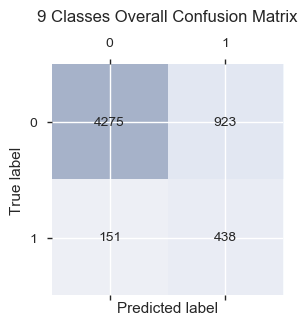

In [51]:
lr = LogisticRegression(penalty = 'l1',  C = 1.0, class_weight='balanced')
clf = BRClassifier(lr)
clf.fit(X_ml, y_ml)

#### 8.2.2 SVM

class_1 {'Precision': 0.312, 'Recall': 0.455, 'F1': 0.37}
class_2 {'Precision': 0.269, 'Recall': 0.389, 'F1': 0.318}
class_3 {'Precision': 0.647, 'Recall': 0.678, 'F1': 0.662}
class_4 {'Precision': 0.333, 'Recall': 0.45, 'F1': 0.383}
class_5 {'Precision': 0.687, 'Recall': 0.667, 'F1': 0.677}
class_6 {'Precision': 0.396, 'Recall': 0.477, 'F1': 0.433}
class_7 {'Precision': 0.467, 'Recall': 0.5, 'F1': 0.483}
class_8 {'Precision': 0.667, 'Recall': 0.612, 'F1': 0.638}
class_9 {'Precision': 0.333, 'Recall': 0.385, 'F1': 0.357}

9 Classes Overall Precision: 0.553, Recall: 0.589, F1 score: 0.570


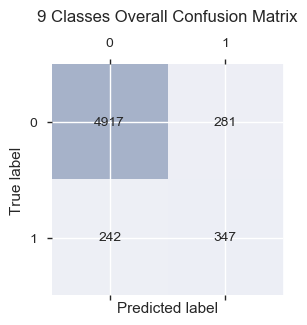

In [50]:
svm = SVC(kernel = 'rbf', C = 100, gamma = 0.01,class_weight='balanced')
clf_svm = BRClassifier(svm)
clf_svm.fit(X_ml, y_ml)

#### 8.2.3 GBDT

class_1 {'Precision': 0.278, 'Recall': 0.455, 'F1': 0.345}
class_2 {'Precision': 0.263, 'Recall': 0.278, 'F1': 0.27}
class_3 {'Precision': 0.701, 'Recall': 0.61, 'F1': 0.652}
class_4 {'Precision': 0.514, 'Recall': 0.45, 'F1': 0.48}
class_5 {'Precision': 0.719, 'Recall': 0.681, 'F1': 0.7}
class_6 {'Precision': 0.543, 'Recall': 0.432, 'F1': 0.481}
class_7 {'Precision': 0.606, 'Recall': 0.512, 'F1': 0.555}
class_8 {'Precision': 0.61, 'Recall': 0.51, 'F1': 0.556}
class_9 {'Precision': 0.7, 'Recall': 0.538, 'F1': 0.609}

9 Classes Overall Precision: 0.625, Recall: 0.557, F1 score: 0.589


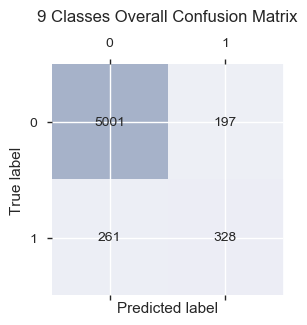

In [52]:
# GBDT did not outperform RF: for each class label, it is sparse and GBDT did not do well on this type of problem
# Next step is to fine tune hyperparameter to see if I can make it better
gbdt = GradientBoostingClassifier(n_estimators = 1000, max_depth = 5, learning_rate = 0.1)
clf_gbdt = BRClassifier(gbdt)
clf_gbdt.fit(X_ml, y_ml)

### GBDT Hyperparameter Tuning
#### This requires grid search best hyperparameter for each classifier and there are overall 9 classifiers. Thus, it is very time consuming to train all classifiers. For each class, the best hyperparameter were tuned but the F1 score for each classifier is still worse than RF. It is most likely because the limited amount of data since GBDT relies on large training data set and non sparse data space.

In [72]:
# grid search best hyperparamters for GBDT

def gridSearchGBDT(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=1,shuffle = True)

    # list of hyperparamter range
    parameters = {
    'n_estimators': [500, 1000],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.1, 1]
             }

    for label in y_train.columns:
        # upsampling minority class
        smt = SMOTE()
        X_smt, y_smt = smt.fit_resample(X_train, y_train[label])
        
        # grid search no. of trees, max depth and learning rate: 2 x 3 x 3 x 9(classes) = 162 fittings
        for n in parameters['n_estimators']:
            for d in parameters['max_depth']: 
                for l in parameters['learning_rate']:
                    gbt = GradientBoostingClassifier(n_estimators= n, learning_rate=l, max_depth=d)
                    gbt.fit(X_smt, y_smt)
                    y_pred = gbt.predict(X_test)

                    precision = precision_score(y_test[label], y_pred)
                    recall = recall_score(y_test[label], y_pred)
                    f1 = f1_score(y_test[label], y_pred)
                    print('class: %s, n_estimators: %d, max_depth: %d, learning_rate: %.3f, precision: %.3f, recall: %.3f, F1: %.3f' % 
                            (label, n, d,l, precision, recall, f1))          

In [73]:
gridSearchGBDT(X_ml, y_ml)

class: class_1, n_estimators: 500, max_depth: 3, learning_rate: 0.010, precision: 0.250, recall: 0.400, F1: 0.308
class: class_1, n_estimators: 500, max_depth: 3, learning_rate: 0.100, precision: 0.250, recall: 0.200, F1: 0.222
class: class_1, n_estimators: 500, max_depth: 3, learning_rate: 1.000, precision: 0.200, recall: 0.200, F1: 0.200
class: class_1, n_estimators: 500, max_depth: 5, learning_rate: 0.010, precision: 0.250, recall: 0.400, F1: 0.308
class: class_1, n_estimators: 500, max_depth: 5, learning_rate: 0.100, precision: 0.200, recall: 0.200, F1: 0.200
class: class_1, n_estimators: 500, max_depth: 5, learning_rate: 1.000, precision: 0.250, recall: 0.400, F1: 0.308
class: class_1, n_estimators: 500, max_depth: 8, learning_rate: 0.010, precision: 0.143, recall: 0.200, F1: 0.167
class: class_1, n_estimators: 500, max_depth: 8, learning_rate: 0.100, precision: 0.286, recall: 0.400, F1: 0.333
class: class_1, n_estimators: 500, max_depth: 8, learning_rate: 1.000, precision: 0.250,

class: class_5, n_estimators: 500, max_depth: 3, learning_rate: 0.010, precision: 0.562, recall: 0.726, F1: 0.634
class: class_5, n_estimators: 500, max_depth: 3, learning_rate: 0.100, precision: 0.685, recall: 0.597, F1: 0.638
class: class_5, n_estimators: 500, max_depth: 3, learning_rate: 1.000, precision: 0.727, recall: 0.645, F1: 0.684
class: class_5, n_estimators: 500, max_depth: 5, learning_rate: 0.010, precision: 0.672, recall: 0.661, F1: 0.667
class: class_5, n_estimators: 500, max_depth: 5, learning_rate: 0.100, precision: 0.778, recall: 0.565, F1: 0.654
class: class_5, n_estimators: 500, max_depth: 5, learning_rate: 1.000, precision: 0.755, recall: 0.645, F1: 0.696
class: class_5, n_estimators: 500, max_depth: 8, learning_rate: 0.010, precision: 0.745, recall: 0.661, F1: 0.701
class: class_5, n_estimators: 500, max_depth: 8, learning_rate: 0.100, precision: 0.769, recall: 0.645, F1: 0.702
class: class_5, n_estimators: 500, max_depth: 8, learning_rate: 1.000, precision: 0.712,

class: class_9, n_estimators: 500, max_depth: 3, learning_rate: 0.010, precision: 0.375, recall: 1.000, F1: 0.545
class: class_9, n_estimators: 500, max_depth: 3, learning_rate: 0.100, precision: 0.500, recall: 0.667, F1: 0.571
class: class_9, n_estimators: 500, max_depth: 3, learning_rate: 1.000, precision: 0.600, recall: 1.000, F1: 0.750
class: class_9, n_estimators: 500, max_depth: 5, learning_rate: 0.010, precision: 0.375, recall: 1.000, F1: 0.545
class: class_9, n_estimators: 500, max_depth: 5, learning_rate: 0.100, precision: 0.600, recall: 1.000, F1: 0.750
class: class_9, n_estimators: 500, max_depth: 5, learning_rate: 1.000, precision: 0.500, recall: 1.000, F1: 0.667
class: class_9, n_estimators: 500, max_depth: 8, learning_rate: 0.010, precision: 0.250, recall: 0.667, F1: 0.364
class: class_9, n_estimators: 500, max_depth: 8, learning_rate: 0.100, precision: 0.333, recall: 0.667, F1: 0.444
class: class_9, n_estimators: 500, max_depth: 8, learning_rate: 1.000, precision: 0.429,

#### 8.2.4 RF

class_1 {'Precision': 0.375, 'Recall': 0.545, 'F1': 0.444}
class_2 {'Precision': 0.353, 'Recall': 0.333, 'F1': 0.343}
class_3 {'Precision': 0.736, 'Recall': 0.651, 'F1': 0.691}
class_4 {'Precision': 0.526, 'Recall': 0.5, 'F1': 0.513}
class_5 {'Precision': 0.746, 'Recall': 0.674, 'F1': 0.708}
class_6 {'Precision': 0.556, 'Recall': 0.455, 'F1': 0.5}
class_7 {'Precision': 0.638, 'Recall': 0.607, 'F1': 0.622}
class_8 {'Precision': 0.61, 'Recall': 0.51, 'F1': 0.556}
class_9 {'Precision': 0.667, 'Recall': 0.615, 'F1': 0.64}

9 Classes Overall Precision: 0.652, Recall: 0.589, F1 score: 0.619


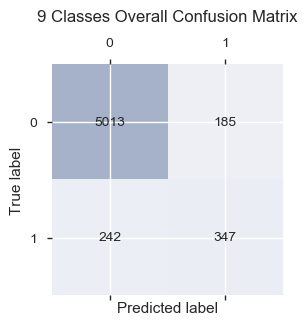

In [55]:
forest = RandomForestClassifier(n_estimators = 1000)
clf_forest = BRClassifier(forest)
clf_forest.fit(X_ml, y_ml)

### 8.3 Classifier Chains

#### As discussed earlier, there is no correlation between different class labels, thus, Classifier Chain may behave similar to Binary Relevance. 

In [56]:
# Build Classifier Chains model using random forest, since it has good record for F1 score.
def ClassifierChains(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=1,shuffle = True)
    
    for label in y_train.columns: 
        clf = RandomForestClassifier(n_estimators = 1000)
        
        # upsampling minority class using synthetic data
        smt = SMOTE()
        X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train[label])
        
        clf.fit(X_train_smt, y_train_smt)
        y_pred = clf.predict(X_test)
        X_train[label] = y_train[label]
        X_test[label] = y_pred
        print(label, f1_score(y_test[label], y_pred))
        

In [56]:
df_cc = ClassifierChains(X_ml, y_ml)

class_1 0.4
class_2 0.3636363636363636
class_3 0.7058823529411765
class_4 0.4931506849315069
class_5 0.6880000000000001
class_6 0.4556962025316455
class_7 0.5974025974025974
class_8 0.611111111111111
class_9 0.64


## 9. Binary Classification Vs. Multi-label Classification

### Use Confusion Matrix and F1 score as metric to compare both approaches and Binary Relevance with Random Forest showed higher F1 score. Thus, Binary Relevance with Random Forest is used to predict the test data set.
#### Binary Classification: {'Precision': 0.594, 'Recall': 0.456, 'F1': 0.516}
#### Multi-label Classification: {'Precision': 0.657, 'Recall': 0.587, 'F1 score': 0.620}

In [57]:
# Direct comparision between Approach I and Approach II:
# In case of binary classification, I removed pure A and pure B samples, who have all positive labels to match 
# with the multi-label classification data set.
# Binary Classification with GBDT: F1 score 0.516: 

# remove pure A and pure B samples
df_bc_9class = df_bc[(df_bc['B_ratio'] != 100) & (df_bc['B_ratio'] != 0)]

# prepare input feature X_2 and label y_2
X_2 = df_bc_9class.drop(['label'], axis = 1)
y_2 = df_bc_9class['label']

# Use best binary classification model GBDT
gbdt_2 = GradientBoostingClassifier(n_estimators = 1000, max_depth = 5, learning_rate = 0.1)
gbdt_clf_2 = BinaryClassification(gbdt_2)
gbdt_clf_2.fit(X_2, y_2)

In [58]:
gbdt_clf_2.scores_

{'Precision': 0.603, 'Recall': 0.457, 'F1': 0.52}

## 10. Test Data Prediction and Submission

In [60]:
# Use Binary Relevance Method combined with RF for test data prediction:
# Load test set
test_ml= pd.read_csv('test_data.csv')

df_test = test_ml.copy()

# Drop the highly correlated features
df_test = df_test.drop(['formulaA_elements_GSbandgap','formulaA_elements_GSestBCClatcnt', 'formulaA_elements_GSvolume_pa',
                     'formulaA_elements_ICSDVolume','formulaA_elements_Column', 'formulaA_elements_Number', 
                      'formulaA_elements_Row','formulaB_elements_GSestBCClatcnt', 'formulaB_elements_GSvolume_pa',
                     'formulaB_elements_ICSDVolume','formulaB_elements_Column', 'formulaB_elements_Number',
                      'formulaB_elements_Row', 'formulaA', 'formulaB'], axis = 1)

In [61]:
# Predict the stability vector for test set

def predict(X, y, test):
    
    test_copy = test.copy()
    
    # predict label for each class, thus there would be 9 predictions
    
    for label in y.columns: 
        clf = RandomForestClassifier(n_estimators = 1000)
        smt = SMOTE()
        X_train_smt, y_train_smt = smt.fit_resample(X, y[label])
        clf.fit(X_train_smt, y_train_smt)
        
        test_copy[label] = clf.predict(test)
        test_copy[label] = test_copy[label].astype(str)
    
    return test_copy
        

In [62]:
test_pred = predict(X_ml, y_ml, df_test)

In [63]:
# Merge all 11 classes together into stabilityVec str format: '[1.0, 0.0, ......, 1.0]'

def submission_ml(df):
    test_pred = df.copy()
    test_pred['stabilityVec'] = test_pred[test_pred.columns[-9:]].apply(lambda x: ','.join(x.astype(np.float).astype(str)), axis = 1)
    test_pred['stabilityVec'] = test_pred['stabilityVec'].apply(lambda x: '[' + '1.0,' + x + ',1.0' + ']')
    sub = test_pred[['formulaA_elements_AtomicWeight','formulaB_elements_AtomicWeight', 'stabilityVec']]
    df_test_submission = pd.merge(test_ml, sub, on=['formulaA_elements_AtomicWeight','formulaB_elements_AtomicWeight'], how = 'inner')
    return df_test_submission


In [64]:
test_sub = submission_ml(test_pred)

In [77]:
test_sub.to_csv('test_submission_ml.csv')

In [70]:
print('There are %d of predictions between Binary Classification and Multi-label Classification are the same' %
      (np.sum(test_sub['stabilityVec'] == df_test_submission ['stabilityVec'])))

There are 549 of predictions between Binary Classification and Multi-label Classification are the same
